Problem Statement: Prepare a prediction model for profit of 50_startups data.Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.

Setup: Import Libraries.

In [3]:
import pandas as pd
import numpy as np

Load the data set.

In [4]:
path='C:\\Users\\USERNAME\\Documents\\Data Science\\Multi linear regression\\50_Startups.csv'
df = pd.read_csv(path)
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Evaluating for Missing Data


The missing values are converted to Python's default. We use Python's built-in functions to identify these missing values. There are two methods to detect missing data:

.isnull()
.notnull()
The output is a boolean value indicating whether the value that is passed into the argument is in fact missing data.

In [5]:
missing_data = df.isnull()
missing_data.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False


"True" stands for missing value, while "False" stands for not missing value.

Count missing values in each column

Using a for loop in Python, we can quickly figure out the number of missing values in each column. As mentioned above, "True" represents a missing value, "False" means the value is present in the dataset. In the body of the for loop the method ".value_counts()" counts the number of "True" values.

In [12]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

R&D Spend
False    50
Name: R&D Spend, dtype: int64

Administration
False    50
Name: Administration, dtype: int64

Marketing Spend
False    50
Name: Marketing Spend, dtype: int64

State
False    50
Name: State, dtype: int64

Profit
False    50
Name: Profit, dtype: int64



# Analyzing Individual Feature Patterns using Visualization

In [16]:
%%capture
! pip install seaborn

import visualization packages "Matplotlib" and "Seaborn".To install seaborn we use the pip which is the python package manager.

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

While ploting it is import to understand the type of variable. Identify type of variable we are dealing with.

In [6]:
print(df.dtypes)

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object


 "State" is actually a categorical variable in data set while here we see. It is mentioned as "object".
 
  We can calculate the correlation between variables of type "int64" or "float64" using the method "corr".

In [7]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In order to start understanding the (linear) relationship between an individual variable and the price. We can do this by using "regplot", which plots the scatterplot plus the fitted regression line for the data.
Let's find the scatterplot of "R&D Spend" and "Profit"

,R&D Spend,Profit
R&D Spend,1.0000,0.9729
Profit,0.9729,1.0000


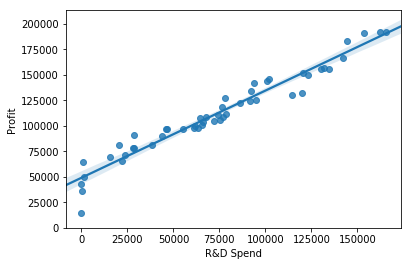

In [9]:
sns.regplot(x='R&D Spend',y='Profit',data=df)
plt.ylim(0,)
df[['R&D Spend','Profit']].corr()

As the 'R&D Spend' goes up, the 'Profit' goes up: this indicates a positive direct correlation between these two variables. 'R&D Spend' seems like a pretty good predictor of profit since the regression line is almost a perfect diagonal line.

We can examine the correlation between 'R&D Spend' and 'Profit' and see it's approximately 0.97.

'Marketing Spend' is a potential predictor variable of Profit.

,Marketing Spend,Profit
Marketing Spend,1.000000,0.747766
Profit,0.747766,1.000000


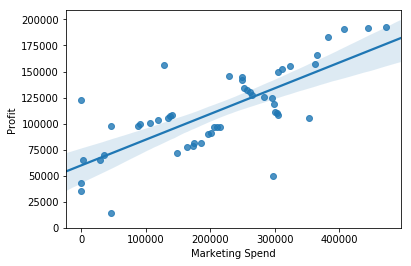

In [10]:
sns.regplot(x='Marketing Spend',y='Profit',data=df)
plt.ylim(0,)
df[['Marketing Spend','Profit']].corr()

We see positive direct correlation between these two variables.

Week linear relationship.
Let's see if "Administration" as a predictor variable of "Profit".

,Administration,Profit
Administration,1.000000,0.200717
Profit,0.200717,1.000000


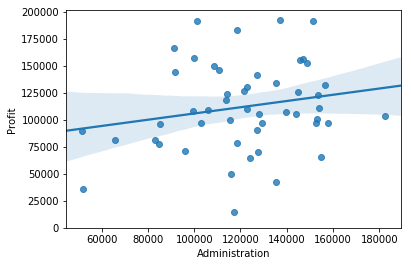

In [18]:
sns.regplot(x='Administration',y='Profit',data=df)
plt.ylim(0,)
df[['Administration','Profit']].corr()

Administration does not seem like a good predictor of the profit at all since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore it's it is not a reliable variable.

# Categorical variables

These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.

Let's look at the relationship between "State" and "Profit".

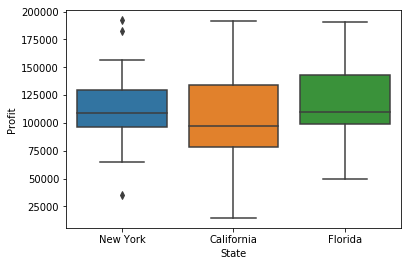

In [12]:
sns.boxplot(x="State", y="Profit", data=df)

We see that the distributions of price between the different States categories have a significant overlap, and so States would not be a good predictor of Profit. There are no other categorical variable in data set.

# Descriptive Statistical Analysis

Let's first take a look at the variables by utilizing a description method.

The describe function automatically computes basic statistics for all continuous variables. Any NaN values are automatically skipped in these statistics.

This will show:

the count of that variable
the mean
the standard deviation (std)
the minimum value
the IQR (Interquartile Range: 25%, 50% and 75%)
the maximum value

In [15]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


The default setting of "describe" skips variables of type object. We can apply the method "describe" on the variables of type 'object' as follows:

In [16]:
df.describe(include=['object'])

,State
count,50
unique,3
top,California
freq,17


Value Counts
Value-counts is a good way of understanding how many units of each characteristic/variable we have. We can apply the "value_counts" method on the column 'State'. Don’t forget the method "value_counts" only works on Pandas series, not Pandas Dataframes. As a result, we only include one bracket "df['State']" not two brackets "df[['State']]".

In [18]:
df['State'].value_counts().to_frame()

,State
California,17
New York,17
Florida,16


If we want to know, on average, which type of drive wheel is most valuable, we can group "drive-wheels" and then average them.

In [9]:
# grouping results
df_group_one = df[['State','Profit']]
df_group_one = df_group_one.groupby(['State'],as_index=False).mean()
df_group_one

,State,Profit
0,California,103905.175294
1,Florida,118774.024375
2,New York,113756.446471


From our data, it seems companies in Florida, on average, has high profit, while Californoa has low profit.

# The main question we want to answer in this module, is "What are the main characteristics which have the most impact on the Company Profit?".

To get a better measure of the important characteristics, we look at the correlation of these variables with the Profit, in other words: how is the Profit dependent on this variable?

#  Correlation and Causation

Correlation: a measure of the extent of interdependence between variables.

Causation: the relationship between cause and effect between two variables.

It is important to know the difference between these two and that correlation does not imply causation. Determining correlation is much simpler the determining causation as causation may require independent experimentation.

Pearson Correlation

The Pearson Correlation measures the linear dependence between two variables X and Y.

The resulting coefficient is a value between -1 and 1 inclusive, where:

1: Total positive linear correlation.
0: No linear correlation, the two variables most likely do not affect each other.
-1: Total negative linear correlation.
Pearson Correlation is the default method of the function "corr". Like before we can calculate the Pearson Correlation of the of the 'int64' or 'float64' variables.

P-value:

What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.

By convention, when the

p-value is  <  0.001: we say there is strong evidence that the correlation is significant.
the p-value is  <  0.05: there is moderate evidence that the correlation is significant.
the p-value is  <  0.1: there is weak evidence that the correlation is significant.
the p-value is  >  0.1: there is no evidence that the correlation is significant.

In [19]:
from scipy import stats

Let's calculate the Pearson Correlation Coefficient and P-value of 'R&D Spend' and 'Profit'.

In [7]:
pearson_coef, p_value = stats.pearsonr(df['R&D Spend'], df['Profit'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value) 

The Pearson Correlation Coefficient is 0.9729004656594831  with a P-value of P =  3.5003222436906035e-32


Conclusion:
Since the p-value is  <  0.001, the correlation between R&D Spend and Profit is statistically significant, along with the  extremely strong linear relationship.(0.972)

In [30]:
pearson_coef, p_value = stats.pearsonr(df['Administration'], df['Profit'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value) 

The Pearson Correlation Coefficient is 0.20071656826872136  with a P-value of P =  0.16221739470358285


Conclusion:
Since the p-value is  >  0.05, the correlation between Administration and Profit is NOT statistically significant.

In [38]:
pearson_coef, p_value = stats.pearsonr(df['Marketing Spend'], df['Profit'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value) 

The Pearson Correlation Coefficient is 0.7477657217414766  with a P-value of P =  4.381073182030992e-10


Conclusion: Since the p-value is < 0.001, the correlation between Marketing Spend and Profit is statistically significant, along with the strong linear relationship.(0.74).

# ANOVA

ANOVA: Analysis of Variance
The Analysis of Variance (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:

F-test score: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.

P-value: P-value tells how statistically significant is our calculated score value.

If our profit variable is strongly correlated with the variable we are analyzing, expect ANOVA to return a sizeable F-test score and a small p-value.

State

Since ANOVA analyzes the difference between different groups of the same variable, the groupby function will come in handy. Because the ANOVA algorithm averages the data automatically, we do not need to take the average before hand.

Let's see if different types 'State' impact 'Profit', we group the data.

In [23]:
df_gptest= df[['State','Profit']]
grouped_test2=df_gptest[['State', 'Profit']].groupby(['State'])
grouped_test2.head(2)
df_gptest

,State,Profit
0,New York,192261.83
1,California,191792.06
2,Florida,191050.39
3,New York,182901.99
4,Florida,166187.94
5,New York,156991.12
6,California,156122.51
7,Florida,155752.60
8,New York,152211.77
9,California,149759.96


In [24]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('California')['Profit'], grouped_test2.get_group('Florida')['Profit'], grouped_test2.get_group('New York')['Profit'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val) 

ANOVA results: F= 0.5747908867225178 , P = 0.5667290310967406


Low F-value and P-value >0.05 signifies 'State' is not statistically significant.But does that mean all the 3 state are not significant? Let's examine state by state.

California and Florida

In [25]:
f_val,p_val=stats.f_oneway(grouped_test2.get_group('California')['Profit'], grouped_test2.get_group('Florida')['Profit'])
print( "ANOVA results: F=", f_val, ", P =", p_val) 

ANOVA results: F= 1.115875456523166 , P = 0.2989714153647271


Low F-value and P-value >0.05. Thus insignificant

In [26]:
f_val,p_val=stats.f_oneway(grouped_test2.get_group('Florida')['Profit'], grouped_test2.get_group('New York')['Profit'])
print( "ANOVA results: F=", f_val, ", P =", p_val) 

ANOVA results: F= 0.13955205498591913 , P = 0.7112694091634706


In [28]:
f_val,p_val=stats.f_oneway(grouped_test2.get_group('New York')['Profit'], grouped_test2.get_group('California')['Profit'])
print( "ANOVA results: F=", f_val, ", P =", p_val) 

ANOVA results: F= 0.44978418219715843 , P = 0.507249425571173


Conclusion: Important Variables

We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:

Continuous numerical variables:

1. R&D spend
2. Marketing Spend

# Model Development : Multiple Linear Regression

Lets load the modules for linear regression

In [33]:
from sklearn.linear_model import LinearRegression

If we want to use more variables in our model to predict car price, we can use Multiple Linear Regression. Multiple Linear Regression is very similar to Simple Linear Regression, but this method is used to explain the relationship between one continuous response (dependent) variable and two or more predictor (independent) variables.
he equation is given by

𝑌ℎ𝑎𝑡=𝑎+𝑏1𝑋1+𝑏2𝑋2+𝑏3𝑋3+𝑏4𝑋4

From the previous section we know that other good predictors of price could be:


1. R&D spend
2. Marketing Spend

Let's develop a model using these variables as the predictor variables.

In [35]:
Z=df[['R&D Spend','Marketing Spend']]

Fit the liner model using above 2 variables.
Create the linear regression object

In [38]:
lm=LinearRegression()
lm.fit(Z, df['Profit'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Intercept and Coefficients

In [41]:
lm.intercept_

46975.86422071998

Intercept : a=46975.86422071998

In [42]:
lm.coef_

array([0.79658404, 0.02990788])

Coeeficients for each of the variables are 

we should get a final linear function with the structure:

𝑌ℎ𝑎𝑡=𝑎+𝑏1𝑋1+𝑏2𝑋2
 
Linear function we get in this example
Profit=46975.86+0.796*R&D Spend+0.0299*Marketing Spend

# Model Evaluation using Visualization

Now that we've developed some models, how do we evaluate our models and how do we choose the best one? One way to do this is by using visualization.

import the visualization package: seaborn

In [ ]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 

How do we visualize a model for Multiple Linear Regression? This gets a bit more complicated because you can't visualize it with regression or residual plot.

One way to look at the fit of the model is by looking at the distribution plot: We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.
First lets make a prediction

In [43]:
Y_hat = lm.predict(Z)

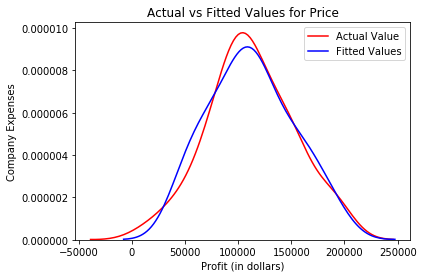

In [46]:
#plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['Profit'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Profit (in dollars)')
plt.ylabel('Company Expenses')

plt.show()
plt.close()

We can see that the fitted values are reasonably close to the actual values, since the two distributions overlap a bit. However, there is definitely some room for improvement.

Lets try Polynomial Regression and Pipelines

# Polynomial Regression and Pipelines

Polynomial regression is a particular case of the general linear regression model or multiple linear regression models.

We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.

There are different orders of polynomial regression:

Quadratic - 2nd order
𝑌ℎ𝑎𝑡=𝑎+𝑏1𝑋2+𝑏2𝑋2

Cubic - 3rd order
𝑌ℎ𝑎𝑡=𝑎+𝑏1𝑋2+𝑏2𝑋2+𝑏3𝑋3

Higher order:
𝑌=𝑎+𝑏1𝑋2+𝑏2𝑋2+𝑏3𝑋3..

The analytical expression for Multivariate Polynomial function gets complicated. For example, the expression for a second-order (degree=2)polynomial with two variables is given by:

𝑌ℎ𝑎𝑡=𝑎+𝑏1𝑋1+𝑏2𝑋2+𝑏3𝑋1𝑋2+𝑏4𝑋21+𝑏5𝑋22
We can perform a polynomial transform on multiple features. First, we import the module:

In [47]:
from sklearn.preprocessing import PolynomialFeatures

We create a PolynomialFeatures object of degree 2:

In [50]:
pr=PolynomialFeatures(degree=2)
pr
Z_pr=pr.fit_transform(Z)
Z.shape


(50, 2)

(50, 2):Originally we had 50 obervations and 2 variables

In [57]:
Z_pr.shape

(50, 6)

After ploynomial transformation we have 50 observation and 6 variables.(X1, X1^2,X2,X2^2,X1*X2)

Pipeline

Data Pipelines simplify the steps of processing the data. We use the module Pipeline to create a pipeline. We also use StandardScaler as a step in our pipeline.

In [59]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

We create the pipeline, by creating a list of tuples including the name of the model or estimator and its corresponding constructor.we input the list as an argument to the pipeline constructor

In [60]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
pipe=Pipeline(Input)
pipe

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

We can normalize the data, perform a transform and fit the model simultaneously.

In [62]:
pipe.fit(Z,df['Profit'])

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [63]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([191204.83255256, 188135.40138977, 180182.29891403, 172685.71195865])

Similarly, we can normalize the data, perform a transform and produce a prediction simultaneously

# Measures for In-Sample Evaluation

When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.

Two very important measures that are often used in Statistics to determine the accuracy of a model are:

R^2 / R-squared
Mean Squared Error (MSE)
R-squared

R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.

The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.

Mean Squared Error (MSE)

The Mean Squared Error measures the average of the squares of errors, that is, the difference between actual value (y) and the estimated value (ŷ).

lets import the function mean_squared_error from the module metrics

In [67]:
from sklearn.metrics import mean_squared_error

# Multiple Linear Regression Model:

 Let's calculate the R^2

In [68]:
# fit the model 
lm.fit(Z, df['Profit'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['Profit']))

The R-square is:  0.9504503015559764


We can say that ~ 95.04 % of the variation of Profit is explained by this multiple linear regression "multi_fit".

Let's calculate the MSE

we produce a prediction

In [69]:
Y_predict_multifit = lm.predict(Z)
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['Profit'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  78887897.00648756


High root mean square: 78887897.0

# Polynomial Fit Model:

Let's calculate the R^2

let’s import the function r2_score from the module metrics as we are using a different function

In [70]:
from sklearn.metrics import r2_score

In [74]:
r_squared = r2_score(df['Profit'], ypipe)
print('The R-square value is: ', r_squared)

The R-square value is:  0.9510449689373062


We can say that ~ 95.10 % of the variation of Profit is explained by this Ploynomial Fit Model.

We can also calculate the MSE:

In [76]:
mean_squared_error(df['Profit'], ypipe)

77941129.203562

In [ ]:
High root mean square: 77941129.20

# Decision Making: Determining a Good Model Fit¶

Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?

What is a good R-squared value?
When comparing models, the model with the higher R-squared value is a better fit for the data.

What is a good MSE?
When comparing models, the model with the smallest MSE value is a better fit for the data.

Let's take a look at the values for the different models.

Multiple Linear Regression: Using R&D Spend, Marketting Spend as Predictor Variables of Profit.

R-squared: 95.04
MSE: 7.8 x10^7

Polynomial Fit: Using R&D Spend, Marketting Spend as a Predictor Variable of Profit.

R-squared: 95.10
MSE:7.7 x 10^7


Conclusion:

Comparing these  models, we conclude that the MLR model is the best model to be able to predict Profit from our dataset. This result makes sense, since we have 4 variables in total, and we know that more than one of those variables are potential predictors of the Company Profit.